In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("diabetes-work.csv")

In [3]:
df.head(5)

,Age,Sex,BMI,BP,Cholesterol,LDL,HDL,Triglycerides,Smoking,Alcohol,Family History of Diabetis,Heart Disease,FBS
0,55,M,31.5,100.0,127.0,81.0,32.0,218.0,No,No,Father,No,123.0
1,41,M,22.5,110.0,186.0,165.0,40.0,256.0,No,No,Father,No,135.0
2,48,M,20.9,140.0,251.0,188.0,36.0,135.0,Occasional,Occasional,No,No,119.0
3,61,F,22.5,170.0,180.0,117.0,35.0,136.0,No,No,"Sister, Brother",No,173.0
4,50,M,26,140.0,310.0,213.5,77.5,96.0,No,Occasional,Father,No,219.0


In [4]:
df.shape

(739, 13)

In [5]:
df.isnull().sum()

Age                            0
Sex                            0
BMI                           80
BP                            18
Cholesterol                    1
LDL                            5
HDL                            5
Triglycerides                  2
Smoking                        0
Alcohol                        0
Family History of Diabetis     0
Heart Disease                  0
FBS                            3
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.dtypes

Age                             int64
Sex                            object
BMI                            object
BP                            float64
Cholesterol                   float64
LDL                           float64
HDL                           float64
Triglycerides                 float64
Smoking                        object
Alcohol                        object
Family History of Diabetis     object
Heart Disease                  object
FBS                           float64
dtype: object

In [8]:
labelencoder=LabelEncoder()
df["Sex"]=labelencoder.fit_transform(df["Sex"])
df["Smoking"]=labelencoder.fit_transform(df["Smoking"])
df["Alcohol"]=labelencoder.fit_transform(df["Alcohol"])
df["Family History of Diabetis"]=labelencoder.fit_transform(df["Family History of Diabetis"])
df["Heart Disease"]=labelencoder.fit_transform(df["Heart Disease"])


In [9]:
df.BMI.map(type).value_counts()

<class 'str'>    628
Name: BMI, dtype: int64

In [10]:
df.BMI = pd.to_numeric(df.BMI,errors='coerce')

In [11]:
df = df.reset_index()
df.drop(['BMI'],axis=1,inplace=True)

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [13]:
scaled_features[:5]

array([[-1.76226142,  0.37961562, -2.84040673, -1.70228369, -1.33981453,
        -0.72175763, -1.69291187,  0.94766298, -0.54183007, -0.59186338,
        -1.15089582, -0.49170864, -0.5644723 ],
       [-1.75755698, -0.94851034, -2.84040673, -1.10784744,  0.22005375,
         1.6831134 , -0.43855168,  1.45707934, -0.54183007, -0.59186338,
        -1.15089582, -0.49170864, -0.38837265],
       [-1.75285254, -0.28444736, -2.84040673,  0.67546132,  1.9385527 ,
         2.34158999, -1.06573178, -0.16500957,  0.31097515,  0.33504486,
        -0.85096322, -0.49170864, -0.62317219],
       [-1.74814811,  0.94881247, -4.58407773,  2.45877008,  0.06142308,
         0.30890138, -1.2225268 , -0.15160388, -0.54183007, -0.59186338,
        -0.77598008, -0.49170864,  0.16927626],
       [-1.74344367, -0.09471508, -2.84040673,  0.67546132,  3.49842098,
         3.07164013,  5.44126167, -0.68783161, -0.54183007,  0.33504486,
        -1.15089582, -0.49170864,  0.84432494]])

In [14]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42
)

In [15]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [16]:
kmeans.inertia_

6534.009151376766

In [17]:
kmeans.cluster_centers_

array([[-0.11199416, -0.10719747,  0.64693526, -0.0026653 , -0.03563385,
        -0.14461119,  0.00398164,  0.28169989,  1.41625561,  1.481484  ,
        -0.03502817, -0.11124485,  0.01625107],
       [-0.05458066,  0.04454355, -0.16901335, -0.16265569, -0.53894996,
        -0.50443099,  0.23285264, -0.27827049, -0.44889617, -0.48194157,
        -0.05522859,  0.02938134, -0.09967081],
       [ 0.20763585,  0.01461236, -0.27806094,  0.31191281,  1.05834592,
         1.09367909, -0.44667826,  0.26830495, -0.45862956, -0.45621827,
         0.13753415,  0.04720878,  0.17455567]])

In [18]:
kmeans.n_iter_

25

In [19]:
kmeans.labels_[:5]

array([1, 2, 2, 2, 2])

In [20]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

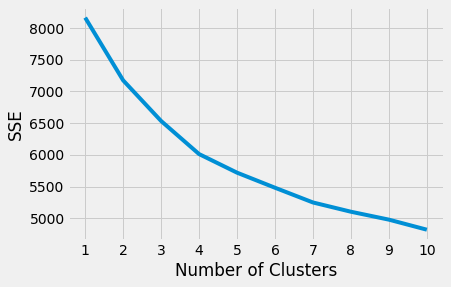

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [22]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

4

## Visualize

* Since we have more than three features, it is not possible to visualize the clusters as they have been formed. But can be visualized based on any 2 features on a 2D Plane. Select a and b values indicating the column numbers from the dataframe to visualize clusters based on any two features.(The column numbers start from 0)

In [30]:
#Change the values of a and b to compare the visualization of different features
a=5
b=7

In [31]:
kmeans = KMeans(
init="random",
n_clusters=4,
n_init=10,
max_iter=300,
random_state=42
)
kmeans.fit(scaled_features)
y_kmeans = kmeans.fit_predict(scaled_features)

In [32]:
X=df.values

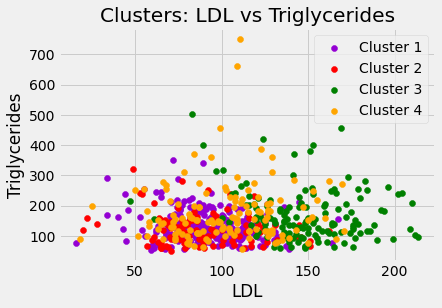

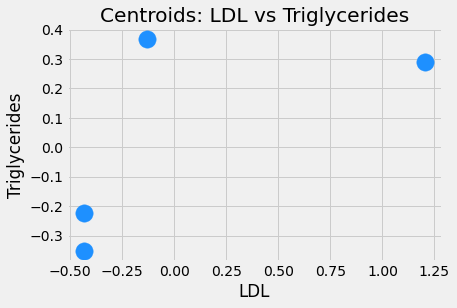

In [33]:
#Plot clusters
plt.scatter(X[y_kmeans==0, a], X[y_kmeans==0, b], c='darkviolet', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, a], X[y_kmeans==1, b], c='red', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, a], X[y_kmeans==2, b], c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, a], X[y_kmeans==3, b], c='orange', label ='Cluster 4')
plt.title('Clusters: '+df.columns[a]+' vs '+df.columns[b])
plt.xlabel(df.columns[a])
plt.ylabel(df.columns[b])
plt.legend()
plt.show()

#Plot the centroid.
plt.scatter(kmeans.cluster_centers_[:, a], kmeans.cluster_centers_[:, b], s=300, c='dodgerblue', label = 'Centroids')
plt.title('Centroids: '+df.columns[a]+' vs '+df.columns[b])
plt.xlabel(df.columns[a])
plt.ylabel(df.columns[b])
plt.show()